In [1]:
!pip install tensorflow matplotlib

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input, decode_predictions


In [3]:
model = MobileNetV2(weights='imagenet')


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:

calorie_dict = {
    "pizza": 285,
    "apple": 95,
    "banana": 105,
    "hamburger": 354,
    "ice_cream": 207,
    "french_fries": 312,
    "fried_egg": 90,
    "hotdog": 151
}


Saving banana.jpeg to banana (3).jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


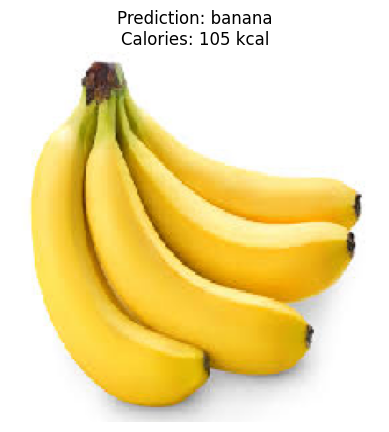

In [10]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    img_path = fn
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    img_preprocessed = preprocess_input(img_batch)

    predictions = model.predict(img_preprocessed)
    label = decode_predictions(predictions, top=1)[0][0][1].lower()


    calories = calorie_dict.get(label, "Unknown")

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label}\nCalories: {calories} kcal" if calories != "Unknown" else f"Prediction: {label}\nCalories: N/A")
    plt.show()
